<a href="https://colab.research.google.com/github/adams1864/Alx_DjangoLearnLab/blob/main/MNIST_CNN_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 #Reshaping and Normalizing
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.9048 - loss: 0.3078 - val_accuracy: 0.9837 - val_loss: 0.0545
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.9854 - loss: 0.0467 - val_accuracy: 0.9892 - val_loss: 0.0391
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 58s 39ms/step - accuracy: 0.9906 - loss: 0.0281 - val_accuracy: 0.9878 - val_loss: 0.0388
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.9942 - loss: 0.0190 - val_accuracy: 0.9895 - val_loss: 0.0348
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 60s 40ms/step - accuracy: 0.9958 - loss: 0.0135 - val_accuracy: 0.9890 - val_loss: 0.0439
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 59s 39ms/step - accuracy: 0.9971 - loss: 0.0099 - val_accuracy: 0.9899 - val_loss: 0.0369
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 58s 38ms/step - accuracy: 0.9973 - loss: 0.0073 - val_accuracy: 0.9905 - val_loss: 0.0389
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 59s 39ms/step - accuracy: 0.9986 -

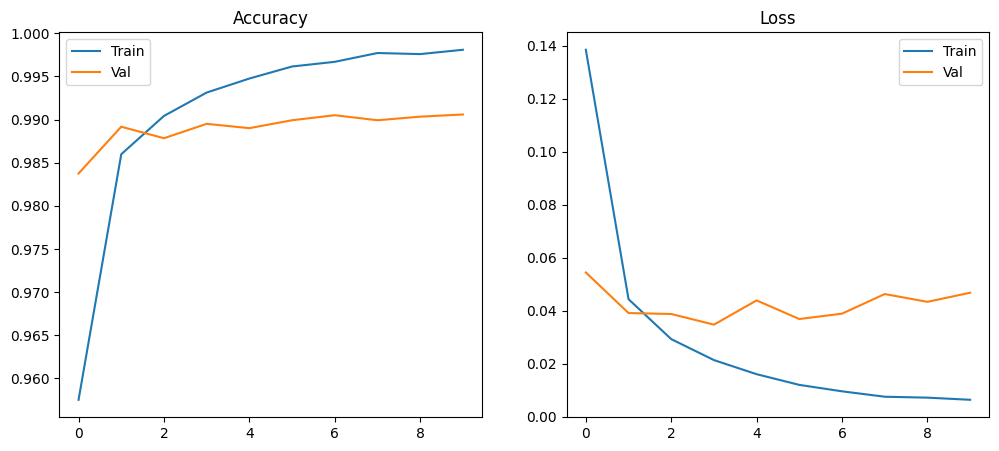

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Final test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9887 - loss: 0.0431
Final test accuracy: 0.9905999898910522


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


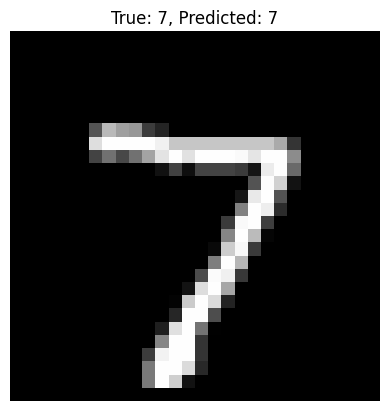

In [ ]:
import numpy as np

sample = x_test[0]
true_label = np.argmax(y_test[0])
pred_label = np.argmax(model.predict(sample.reshape(1,28,28,1)))

plt.imshow(sample.squeeze(), cmap='gray')
plt.title(f"True: {true_label}, Predicted: {pred_label}")
plt.axis('off')
plt.show()